# Experimenty s výkonem
Testy na RLC,
aneb Trocha dumání nad podstatou výkonu bytí a tak vůbec...

Rozlišujeme několik typů elektrického výkonu:

| Název | Symbol | Jednotka|
|:-|:-:|:-:|
| Činný| $P$ | W |
| Jalový | $Q$ | var |
| Zdánlivý | $S$ | VA |
| Komplexní | $\hat{S}$ | VA |

## Účinník $cos(\varphi)$
Úhel $\varphi$ je mezi napětím a proudem. Hodnotu 1 účinník nabývá pro rezistivní zátěž, 0 pro jalovou.


## Okamžitý výkon
Okamžitá hodnota výkonu v konkrétním čase.
$$p(t) = u(t) \cdot i(t)$$

## Činný výkon
Energie, která se na zátěži přemění v teplo.
$$P = U_{ef} \cdot I_{ef} \cdot \cos(\varphi)$$

## Jalový výkon (reaktivní)
Tento výkon v obvodu cyrkuluje, tedy nedisipuje. V obvodu jej můžeme pozorovat, pokud zátěž není ryze rezistivní. V první fázi je energie ze zdroje odebírána pro vytvožení elektrostatického či elektromagnetického pole, ale poté je do obvodu navracena, při jeho zanikání. Na induktivní zátěži je kladný na kapacitní záporný.
$$Q = U_{ef} \cdot I_{ef} \cdot \sin(\varphi)$$

## Zdánlivý
Nemá fyzikální význam jako P či Q, ale používá se pro výkonové dimenzování prvků v obvodu.
$$S = \sqrt{P^2 + Q^2}$$

## Komplexní výkon
Jde o výkon, jehož složkami jsou P a Q.
$$\hat{S} = P + jQ = S$$
$$\hat{S} = \hat{U}\hat{I}^*$$
Proč je tu komplexní združení proudu? 
\begin{eqnarray}
\hat{U} &=& U_{ef} e^{j\omega t + j\varphi_1} \\
\hat{I} &=& I_{ef} e^{j\omega t + j\varphi_2} \\
\hat{I}^* &=& I_{ef} e^{-j\omega t - j\varphi_2} \\
\hat{S} &=& \hat{U}\hat{I}^* = U_{ef}I_{ef} e^{j\omega t + j\varphi_1 - j\omega t - j\varphi_2} =
\hat{U}\hat{I}^* = U_{ef}I_{ef} e^{j(\varphi_1 - \varphi_2)}
\end{eqnarray}

__Komplexní združení proudu je tedy nutné, aby to vyšlo c.b.d.__

In [1]:
import sympy as sp
import numpy as np
from IPython.display import display, Markdown, Math
from matplotlib import pyplot as plt
from engineering_notation import EngNumber

In [2]:
def phasor(number: complex, name:str=None, unit:str=None) -> None:
    number = complex(number)
    module = EngNumber(np.abs(number))
    angle = np.rad2deg(np.angle(number))
    name = '' if name is None else f'\hat{{{name}}} ='
    unit = '' if unit is None else f'~{unit}'
    display(Math(f'{name}{module}∠{angle:.4}°{unit}'))

In [3]:
def scalar(number: complex, name:str=None, unit:str=None) -> None:
    number = EngNumber(number)
    name = '' if name is None else f'{name} ='
    unit = '' if unit is None else f'~{unit}'
    display(Math(f'{name}{number}{unit}'))

In [4]:
def phasor_to_time(phasor: complex, f: float, tim: np.ndarray) -> np.ndarray:
    amplitude = np.abs(phasor) * np.sqrt(2)
    angle = np.angle(phasor)
    angular_velocity = 2 * np.pi *f
    return amplitude * np.sin(angular_velocity * tim + angle)

In [5]:
U = 12 # V ef
L = 10e-3 # H
C = 33e-3 # F
R = 10 # Ω
f = 50 # Hz
w = 2 * np.pi * f

In [6]:
phasor(U, 'U', 'V')

<IPython.core.display.Math object>

In [7]:
Zl = 1j*w*L
phasor(Zl, 'Z_L', 'Ω')

<IPython.core.display.Math object>

In [8]:
Zc = 1/(1j*w*C)
phasor(Zc, 'Z_c', 'Ω')

<IPython.core.display.Math object>

In [9]:
Z = R + Zl + Zc
phasor(Z, 'Z', 'Ω')

<IPython.core.display.Math object>

In [10]:
I = U / Z
phasor(I, 'I', 'A')

<IPython.core.display.Math object>

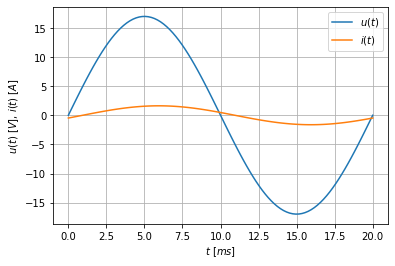

In [11]:
tim = np.linspace(0, 1/f, 100)

u_t = phasor_to_time(U, f, tim)
i_t = phasor_to_time(I, f, tim)

plt.plot(tim*1e3, u_t, label='$u(t)$')
plt.plot(tim*1e3, i_t, label='$i(t)$')
plt.grid(True)
plt.xlabel('$t$ $[ms]$')
plt.ylabel('$u(t)$ $[V]$, $i(t)$ $[A]$')
plt.legend()
plt.show()

In [12]:
S = U * I.conjugate()
phasor(S, 'S', 'VA')
phasor(U*I, 'S_{{chybně}}', 'VA')
phasor(Z * I * I.conjugate())
phasor(U * (U / Z).conjugate())



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

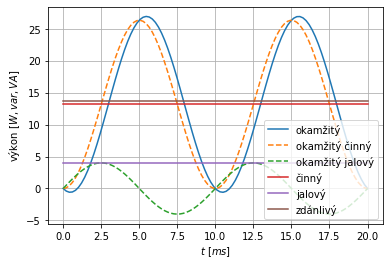

In [13]:
p_t = u_t * i_t
phi = np.angle(U) - np.angle(I)
p_c_t = np.abs(U) * np.abs(I) * np.cos(phi) * (1 - np.cos(2*w*tim))
p_j_t = np.abs(U) * np.abs(I) * np.sin(phi) * np.sin(2*w*tim)

P_t = S.real + tim*0
Q_t = S.imag + tim*0
S_t = abs(S) + tim*0

tim *= 1e3 # posun času s → ms

plt.plot(tim, p_t, label='okamžitý')
plt.plot(tim, p_c_t, '--', label='okamžitý činný')
plt.plot(tim, p_j_t, '--', label='okamžitý jalový')
plt.plot(tim, P_t, label='činný')
plt.plot(tim, Q_t, label='jalový')
plt.plot(tim, S_t, label='zdánlivý')
plt.grid(True)
plt.legend()
plt.xlabel('$t$ $[ms]$')
plt.ylabel('výkon $[W, var, VA]$')
plt.show()

tim *= 1e-3 # posun času ms → s

In [14]:
scalar(S.real, 'P', 'W')
scalar(S.imag, 'Q', 'var')
phasor(S, 'S', 'VA')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

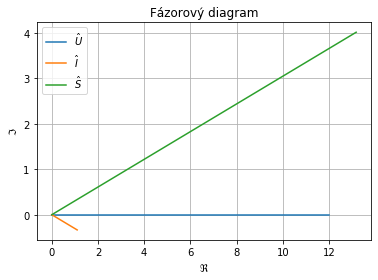

In [15]:
plt.plot([0, U.real], [0, U.imag], label='$\^U$')
plt.plot([0, I.real], [0, I.imag], label='$\^I$')
plt.plot([0, S.real], [0, S.imag], label='$\^S$')

plt.xlabel('$\Re$')
plt.ylabel('$\Im$')
plt.grid(True)
plt.legend()
plt.title('Fázorový diagram')
plt.show()